#Importing Some Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Load the Dataset

In [101]:
df= pd.read_csv('/content/fashion-mnist_train.csv',nrows=5000)

#Exploratory Data Analysis

In [102]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df.shape

(5000, 785)

In [104]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [105]:
df.duplicated().sum()

0

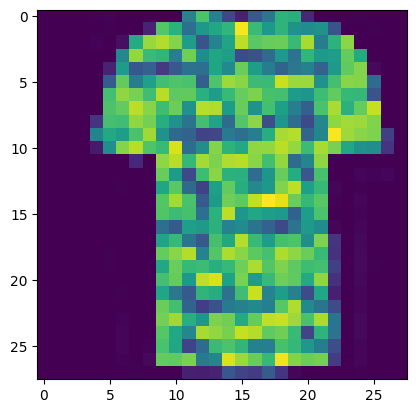

In [106]:

image_pixels = df.iloc[3, :-1].values

# Reshape the pixel values into a 28x28 array
sample = np.reshape(image_pixels, (28, 28))

plt.imshow(sample)

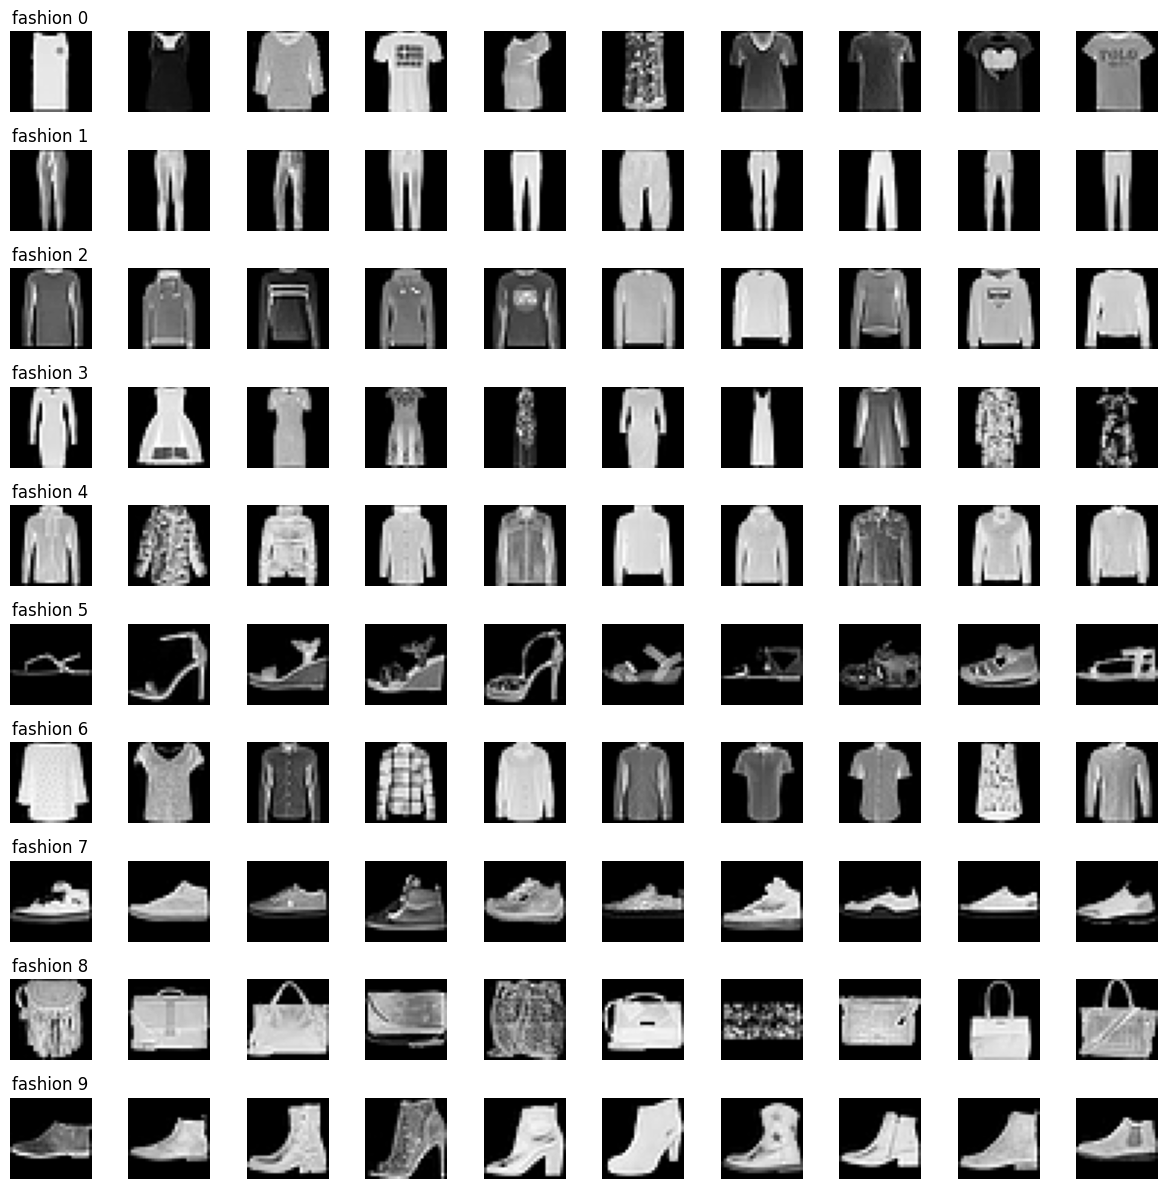

In [107]:
x= df.iloc[:,1:].values
y= df.iloc[:,0].values

# Set the number of images per fashion to display
n = 10

plt.figure(figsize=(12, 12))

# Iterate over each fashion (0-9)
for fashion in range(10):
    # Get indices of images corresponding to the current fashion
    indices = np.where(y == fashion)[0]

    # Check if there are enough images for this fashion
    if len(indices) < n:
        continue  # Skip this fashion if there are not enough images

    # Randomly select n indices without replacement
    chosen_indices = np.random.choice(indices, n, replace=False)

    # Plot the selected images in a row for the current fashion
    for i, idx in enumerate(chosen_indices):
        # Reshape the image and display it
        fashion_image = x[idx].reshape(28, 28)  # Reshape to 28x28
        plt.subplot(10, n, fashion * n + i + 1)  # Position the subplot
        plt.imshow(fashion_image, cmap='gray')  # Display the image
        plt.axis('off')  # Turn off axis labels

        # Set the title for the first image in the row with the fashion label
        if i == 0:
            plt.title(f"fashion {fashion}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#Before PCA

##Feature Engineering

Separate features and target coloms

In [108]:
x= df.iloc[:,1:].values
y= df.iloc[:,0].values

Splitting into train and test data

In [109]:
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2,random_state=2)

In [110]:
x.shape,x_train.shape,x_test.shape

((5000, 784), (4000, 784), (1000, 784))

Training the Machine Learning Model

In [111]:
#from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)

In [112]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [113]:
y_test_pred= knn.predict(x_test)

Model Evaluation

In [114]:
#from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_test_pred)
print('test part accuracy before PCA: ',score)


test part accuracy before PCA:  0.809


#After PCA

Feature Scaling

In [115]:
#from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [116]:
x_train_scale= sc.fit_transform(x_train)
x_test_scale= sc.transform(x_test)

To select the right number of PCA components based on accuracy, you can create a function that iterates over a range of PCA components, fits a model for each number of components, and evaluates the accuracy. Then, you can choose the number of components that yields the best accuracy.

In [117]:
accuracy =[]

for i in range(1,85):  #use-(1,785)
  pca= PCA(n_components=i)
  x_train_pca= pca.fit_transform(x_train_scale)
  x_test_pca= pca.transform(x_test_scale)

  knn= KNeighborsClassifier(n_neighbors=5)
  knn.fit(x_train_pca,y_train)

  y_test_pred= knn.predict(x_test_pca)
  score = accuracy_score(y_test,y_test_pred)
  accuracy.append(score)

accuracy= pd.DataFrame(accuracy, columns=['Accuracy'])
accuracy_sorted = accuracy.sort_values(by='Accuracy', ascending=False)


In [118]:
accuracy

,Accuracy
0,0.239
1,0.501
2,0.601
3,0.688
4,0.720
...,...
79,0.820
80,0.820
81,0.820
82,0.824


In [131]:
#from sklearn.decomposition import PCA
pca= PCA(n_components=83)

In [132]:
x_train_pca= pca.fit_transform(x_train)
x_test_pca= pca.transform(x_test)

In [133]:
knn= KNeighborsClassifier(n_neighbors=5)

In [134]:
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [135]:
x_train.shape,x_train_pca.shape    #reducing its dimensionality

((4000, 784), (4000, 83))

In [136]:
y_test_pred= knn.predict(x_test_pca)

In [137]:
#from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_test_pred)
print('test part accuracy after PCA: ',score)

test part accuracy after PCA:  0.821


In [138]:
pca.explained_variance_ratio_

array([0.29150828, 0.17581826, 0.06046398, 0.05084267, 0.03840783,
       0.03445548, 0.02268728, 0.01969446, 0.01376457, 0.01317793,
       0.00963777, 0.00909663, 0.00770452, 0.00652719, 0.00629037,
       0.00599131, 0.00562205, 0.0052226 , 0.00462515, 0.00451955,
       0.00428487, 0.00405535, 0.00386458, 0.00378134, 0.00360545,
       0.00355648, 0.003352  , 0.00327244, 0.00305258, 0.00301318,
       0.00279863, 0.00270912, 0.00265852, 0.00258076, 0.00244857,
       0.00242151, 0.00233886, 0.00226613, 0.00221578, 0.00212713,
       0.00206856, 0.00201837, 0.00193665, 0.00182514, 0.00177466,
       0.0017704 , 0.00174404, 0.00168028, 0.00165442, 0.00161803,
       0.00157952, 0.0014731 , 0.00145535, 0.00144347, 0.00141179,
       0.00138657, 0.00134785, 0.00133162, 0.00132112, 0.00127238,
       0.00125291, 0.00123883, 0.0012133 , 0.00117873, 0.00115883,
       0.00114442, 0.00112021, 0.00108731, 0.00105858, 0.00104684,
       0.00103682, 0.0010262 , 0.00097802, 0.00096687, 0.00096

In [139]:
0.29014934, 0.17756662, 0.06018302, 0.0499087 , 0.0385422

(0.29014934, 0.17756662, 0.06018302, 0.0499087, 0.0385422)

#Building a prediction system for evaluating

In [140]:
x_test[1]


array([  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
        11,   0,   0,   7,   0,   0,   3,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        49, 254, 255, 234, 232, 230, 196,   0,   0,   0,   0,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        54, 193, 250, 241, 213, 197, 206, 225, 251, 209,  65,   0,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
        49, 146, 175, 245, 236, 235, 226, 199, 223, 234, 235, 250, 214,
       159,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         0,  14, 134, 102, 208, 242, 238, 238, 239, 227, 231, 236, 239,
       238, 232, 156, 119,  87,   0,   3,   0,   0,   0,   0,   0,   0,
         0,   6,   0,  71, 106, 154, 240, 238, 237, 236, 231, 229, 237,
       228, 233, 240, 243, 207,  90, 119,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  94, 137, 181, 246, 237, 233, 23

In [143]:
input =[x_test_pca[2]]
print(f'actual label :[{y_test[2]}]')

predicted_class =knn.predict(input)
print('predicted label :',predicted_class)

actual label :[1]
predicted label : [1]


#Saving the model

In [142]:
import joblib as jb
jb.dump(knn,'Fashion_MNIST_apk')
chappie =jb.load('Fashion_MNIST_apk')